<a href="https://colab.research.google.com/github/lattehauma/-/blob/main/%EC%84%9C%EB%B2%A0%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D(%EB%B6%80%EC%8A%A4%ED%8A%B8%EC%BD%94%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
question=pd.read_csv('/content/drive/MyDrive/colab/survey2017/schema.csv')

In [ ]:
print(question.shape)
question.head()

(290, 3)


,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [3]:
mcq=pd.read_csv('/content/drive/MyDrive/colab/survey2017/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)

In [ ]:
print(mcq.shape)
print(mcq.columns)
mcq.head()

(16716, 228)
Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

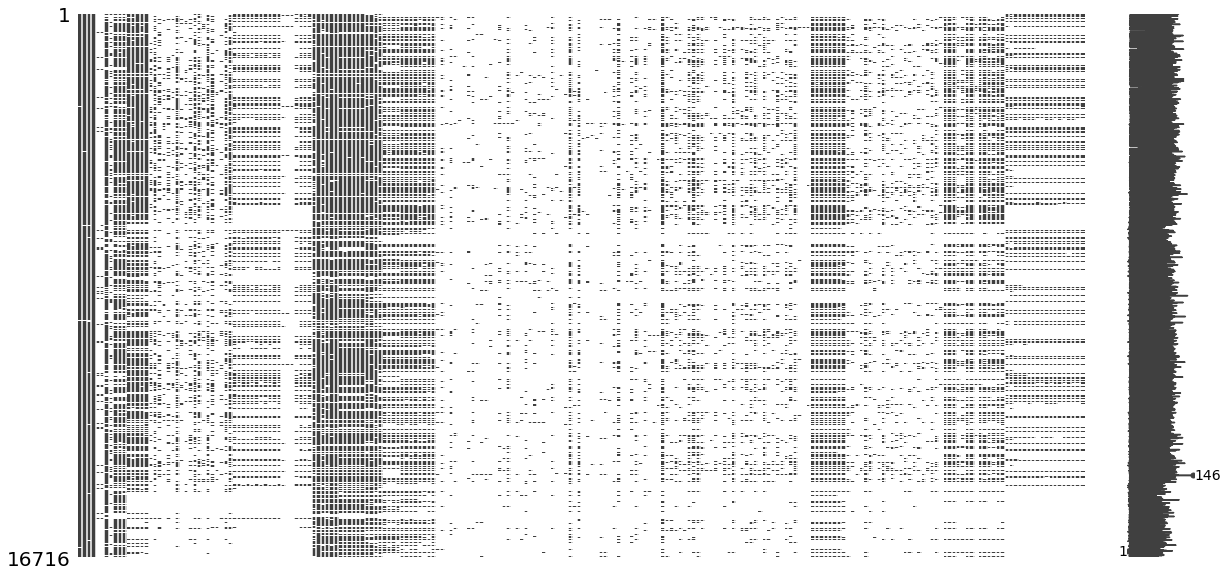

In [ ]:
#missingno 결측값이 얼마나 있는지 전반적으로 파악할 수 있는 그래프
#시각화 할 때 도움이될 수 있음

import missingno as msno
msno.matrix(mcq, figsize=(20,10))

## 설문통계

성별

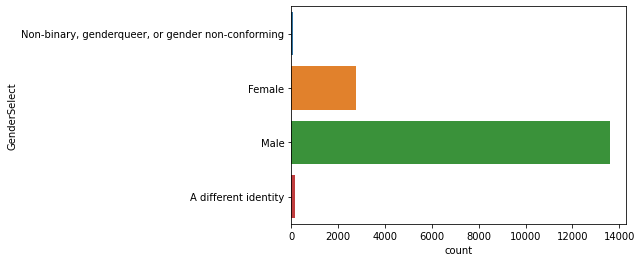

In [ ]:
sns.countplot(y='GenderSelect', data=mcq)

연령

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


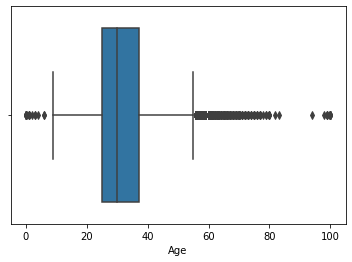

In [ ]:
print(mcq['Age'].describe())
sns.boxplot('Age', data=mcq)

국가

In [ ]:
#국가별 응답수
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['country']=con_df.index 
#인덱스를 설정해주는 부분(현재 인덱스가 국가명으로 되어 있기 때문에 인덱스를 따로 분리해서 column으로 만들어 줌)
con_df.columns=['count','country']
con_df=con_df.reset_index().drop('index', axis=1) #다시 불필요한 인덱스 제거
con_df.head(10)

,count,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


학위

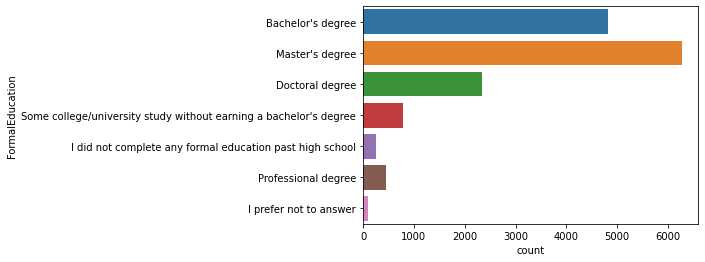

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

전공

In [ ]:
mjcount=pd.DataFrame(mcq['MajorSelect'].value_counts())
mjper=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mj=mjcount.merge(mjper, left_index=True, right_index=True)
mj.columns=['count','per']
mj

,count,per
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


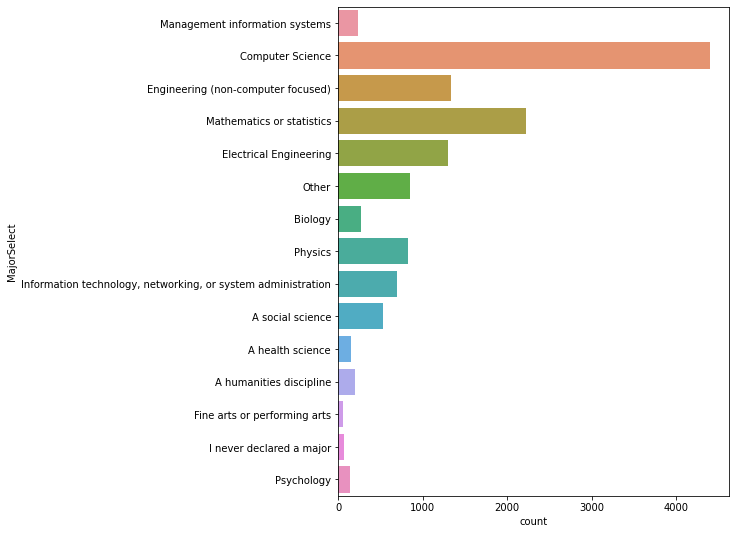

In [ ]:
plt.figure(figsize=(7,9))
sns.countplot(y='MajorSelect', data=mcq)

취업 여부


In [ ]:
escount=pd.DataFrame(mcq['EmploymentStatus'].value_counts())
esper=pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
es=escount.merge(esper, left_index=True, right_index=True)
es.columns=['count','per']
es

,count,per
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


프로그래밍 경험

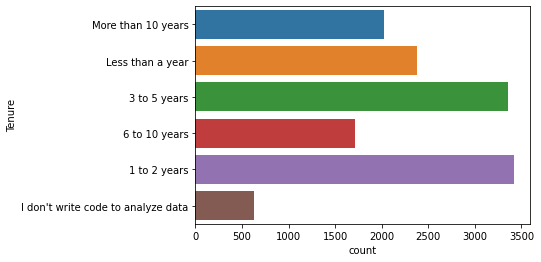

In [ ]:
sns.countplot(y='Tenure', data=mcq)

한국 한정된 분석

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


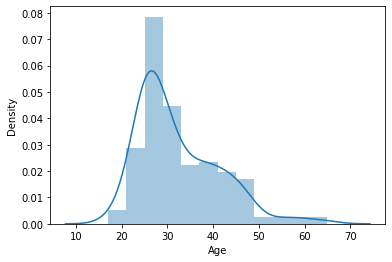

In [ ]:
kr=mcq.loc[(mcq['Country']=='South Korea')]
sns.distplot(kr['Age'].dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


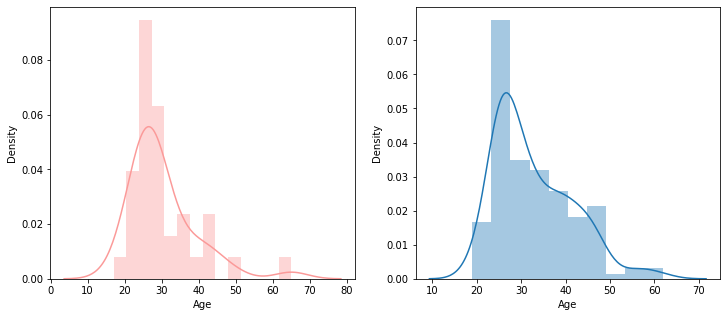

In [ ]:
figure, ax=plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(kr['Age'].loc[kr['GenderSelect']=='Female'].dropna(), color=sns.color_palette("Paired")[4], ax=ax[0])
sns.distplot(kr['Age'].loc[kr['GenderSelect']=='Male'].dropna(), ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


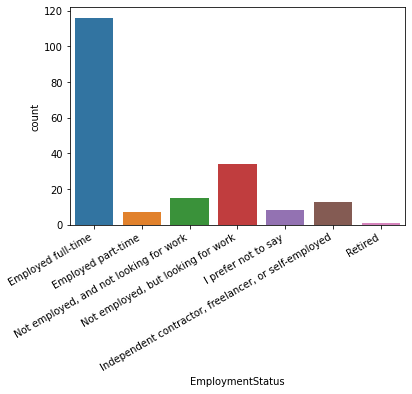

In [ ]:
sns.countplot('EmploymentStatus', data=kr)
plt.xticks(rotation=30, ha='right')
plt.show()

##자주묻는 질문 F&Q


추천하는 언어

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

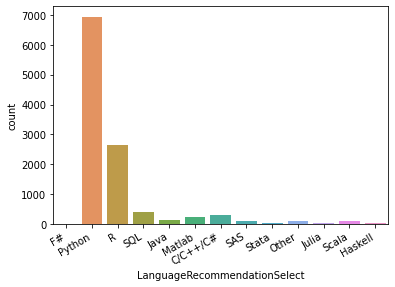

In [ ]:
sns.countplot(mcq['LanguageRecommendationSelect'])
plt.xticks(rotation=30, ha='right')


현재하고 있는 일

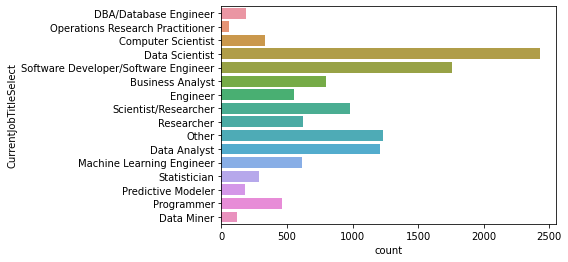

In [ ]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [ ]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

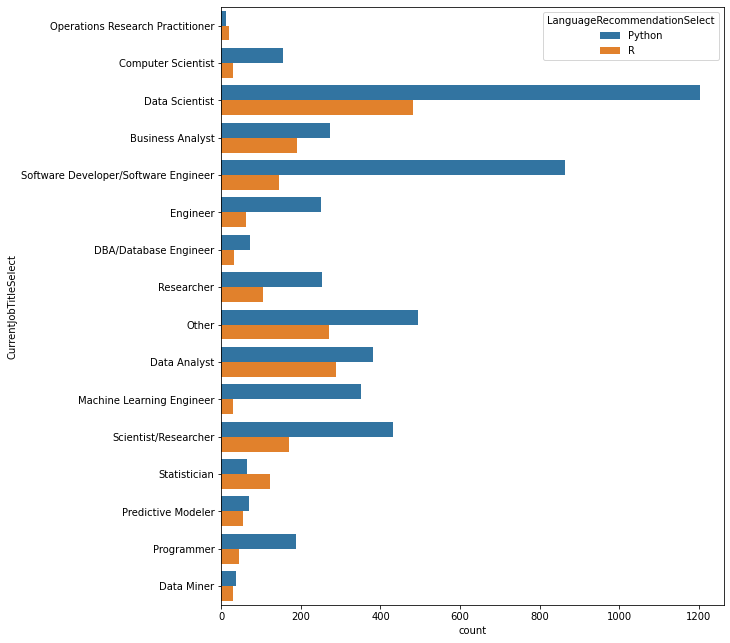

In [ ]:
data=mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
         (mcq['LanguageRecommendationSelect']=='Python') |
         (mcq['LanguageRecommendationSelect']=='R'))
]
plt.figure(figsize=(9,11))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

데이터 사이언스 분야에서 앞으로 주목받을 것은 무엇일까

In [ ]:
toolcount=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
toolper=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
tool=toolcount.merge(toolper, left_index=True, right_index=True).head(20)
tool.columns=['count','per']
tool

,count,per
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


데이터 사이언스 방법

In [ ]:
mcq['MLMethodNextYearSelect'].value_counts()

Deep learning                                  4362
Neural Nets                                    1386
Time Series Analysis                            680
Bayesian Methods                                511
Text Mining                                     493
Genetic & Evolutionary Algorithms               425
Social Network Analysis                         364
Anomaly Detection                               307
Ensemble Methods (e.g. boosting, bagging)       269
Other                                           258
Monte Carlo Methods                             230
Regression                                      220
Cluster Analysis                                216
I don't plan on learning a new ML/DS method     195
Decision Trees                                  156
Random Forests                                  154
Support Vector Machines (SVM)                   147
Survival Analysis                               104
Proprietary Algorithms                           98
Factor Analy

어디에서 데이터 사이언스를 배워야하는가

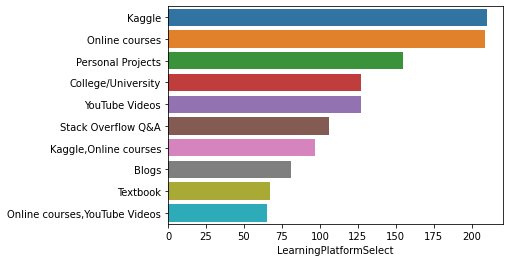

In [ ]:
data1=mcq[mcq['LearningPlatformSelect']!='nan']
data=data1['LearningPlatformSelect'].value_counts().head(10)
sns.barplot(y=data.index, x=data)

설문 내용 분석

In [ ]:
qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

##loc로 열 이름을 검색할 수도 있음

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [ ]:
#???? 
uf=[x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]
uf

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [ ]:
fdf={}
for ft in uf:
  a=mcq[ft].value_counts()
  a=a/a.sum()
  fdf[ft[len('LearningPlatformUsefulness'):]] =a
  #뒤에 단어만 인덱스로 뽑아내기 위해서 길이를 사용해서 그 이후만 잘라줬음

fdf=pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

fdf


,Not Useful,Somewhat useful,Very useful
Projects,0.008135,0.247184,0.744681
Courses,0.007844,0.292056,0.700100
SO,0.011348,0.362411,0.626241
Kaggle,0.008507,0.372323,0.619171
Tutoring,0.022440,0.399018,0.578541
Textbook,0.016503,0.429562,0.553934
College,0.030068,0.418279,0.551652
Arxiv,0.015475,0.434128,0.550397
Documentation,0.018096,0.459716,0.522189
Communities,0.014011,0.496497,0.489492


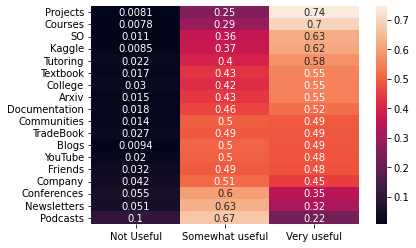

In [ ]:
sns.heatmap(fdf, annot=True)

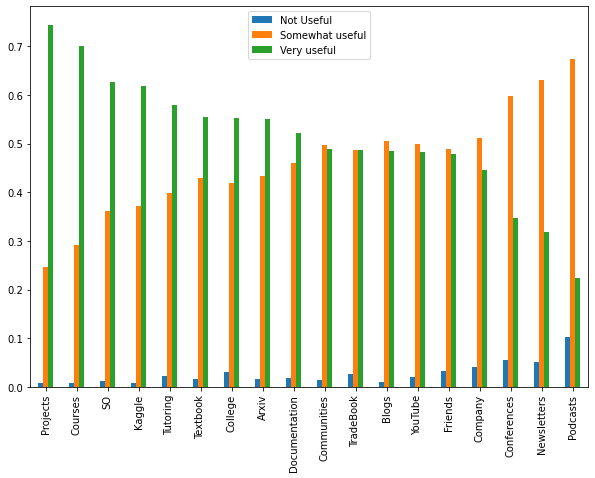

In [ ]:
fdf.plot(kind='bar', figsize=(10,7))

In [ ]:
cf=[x for x in mcq.columns if x.find('LearningCategory') != -1]
cf

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [ ]:
cdf={}
for ft in cf:
  cdf[ft[len('LearningCategory'):]]=mcq[ft].mean()

cdf=pd.Series(cdf)

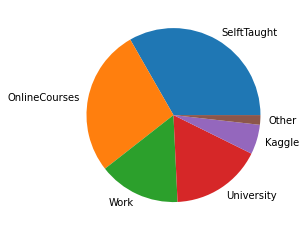

In [ ]:
plt.pie(cdf, labels= cdf.index)
plt.show()

데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [4]:
mcq['HardwarePersonalProjectsSelect'].head(10)

0                                                  NaN
1                                                  NaN
2                               Basic laptop (Macbook)
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    Basic laptop (Macbook),Gaming Laptop (Laptop +...
8                                                  NaN
9                                                  NaN
Name: HardwarePersonalProjectsSelect, dtype: object

In [5]:
mcq['HardwarePersonalProjectsSelect']=mcq['HardwarePersonalProjectsSelect'].astype('str').apply(
    lambda x: x.split(',')
)
#자료를 ,를 기준으로 나눠주었음 [a,b]형태로 저장됨 
#split함수는 string 개체에만 적용가능하므로 str로 변환시켜주는 것이 필요

print(mcq['HardwarePersonalProjectsSelect'].head(10))



0                                                [nan]
1                                                [nan]
2                             [Basic laptop (Macbook)]
3                                                [nan]
4                                                [nan]
5                                                [nan]
6                                                [nan]
7    [Basic laptop (Macbook), Gaming Laptop (Laptop...
8                                                [nan]
9                                                [nan]
Name: HardwarePersonalProjectsSelect, dtype: object


In [6]:
s=mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='hardware'
s=s[s != 'nan']
s.head(10)

2                                Basic laptop (Macbook)
7                                Basic laptop (Macbook)
7             Gaming Laptop (Laptop + CUDA capable GPU)
10    Laptop or Workstation and local IT supported s...
12                               Basic laptop (Macbook)
12                              Traditional Workstation
18                               Basic laptop (Macbook)
19            Gaming Laptop (Laptop + CUDA capable GPU)
19                              Traditional Workstation
20                               Basic laptop (Macbook)
Name: hardware, dtype: object

In [7]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
GCE ...),669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


데이터 사이언스 공부에 얼마나 많은 시간을 사용하고 있는가?

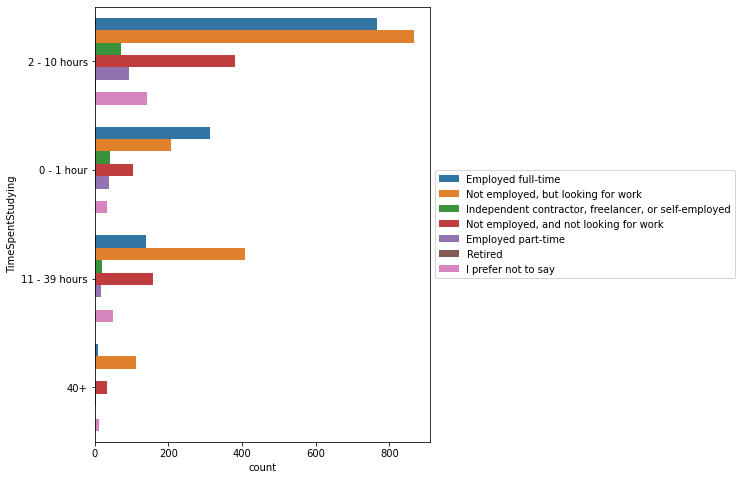

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1,0.5))
#bbox_to_anchor 범례의 위치를 설정할 수 있음

블로그, 팟캐스트, 수업, 기타 등등 추천할 만한 것이 있는가

In [8]:
mcq['BlogsPodcastsNewslettersSelect']=mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(
    lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [9]:
s=mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='site'
s=s[s != 'nan']
s.head(20)

0                    Becoming a Data Scientist Podcast
0                              Data Machina Newsletter
0                             O'Reilly Data Newsletter
0                         Partially Derivative Podcast
0                           R Bloggers Blog Aggregator
1                    Becoming a Data Scientist Podcast
1                          Siraj Raval YouTube Channel
2                                          FastML Blog
2                                   No Free Hunch Blog
2                             Talking Machines Podcast
3                                       KDnuggets Blog
4                              Data Machina Newsletter
4                          Jack's Import AI Newsletter
4                             O'Reilly Data Newsletter
5    Other (Separate different answers with semicolon)
7                    Becoming a Data Scientist Podcast
7                          Siraj Raval YouTube Channel
7                             The Data Skeptic Podcast
8         

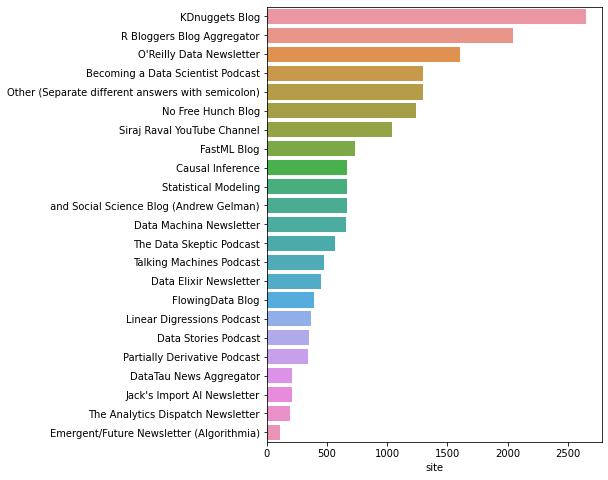

In [10]:
s=s.value_counts()
plt.figure(figsize=(6,8))
sns.barplot(y=s.index, x=s)

In [11]:
mcq['CoursePlatformSelect']=mcq['CoursePlatformSelect'].astype('str').apply(
    lambda x: x.split(','))

In [12]:
s=mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name='course'
s=s[s != 'nan']
s.head(20)

2     Coursera
2          edX
7     Coursera
10    Coursera
12    Coursera
12    DataCamp
12         edX
20       Other
38    Coursera
38    DataCamp
38         edX
46    Coursera
46         edX
46     Udacity
53    Coursera
53         edX
53     Udacity
57    Coursera
64    Coursera
70    Coursera
Name: course, dtype: object

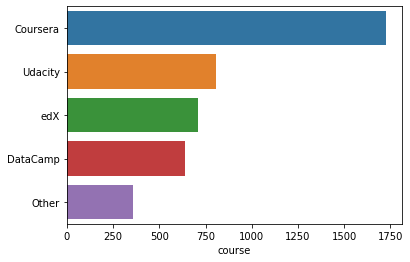

In [13]:
t=s.value_counts()
sns.barplot(y=t.index, x=t)

데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬

In [ ]:
jf=[
    x for x in mcq.columns if x.find(
    'JobSkillImportance') != -1
    and x.find('JobSkillImportanceOther') == -1]
jf

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [ ]:
jdf={}
for ft in jf:
  a=mcq[ft].value_counts()
  a=a/a.sum()
  jdf[ft[len('JobSkillImportance'):]] = a
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [ ]:
jdf=pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


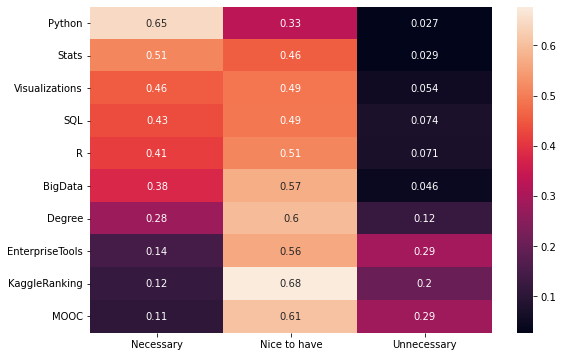

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(jdf.sort_values("Necessary", ascending=False), annot=True)

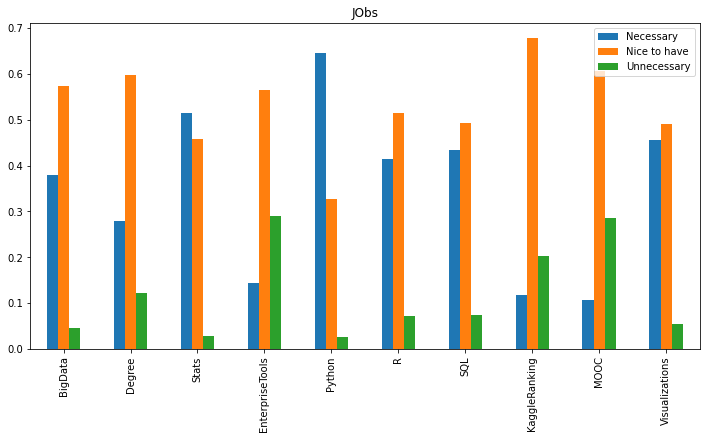

In [ ]:
jdf.plot(kind='bar', figsize=(12,6), title="JObs")


데이터 과학자의 평균 급여는 얼마나 될까?

In [ ]:
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount']=mcq['CompensationAmount'].str.replace('-','')

In [ ]:
mcq[mcq['CompensationAmount'].notnull()]['CompensationAmount'].head(10)

3      250000
8       80000
9     1200000
11      95000
14    1100000
15     120000
21      20000
22     100000
23      20000
25     624000
Name: CompensationAmount, dtype: object

In [ ]:
rates=pd.read_csv('/content/drive/MyDrive/colab/survey2017/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
#inplace를 적용해주어야 원본 개체에도 반영이 된다. (drop정보를 저장함)

salary = mcq[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
#결측값 있는 행은 전체제거함 (기본 defalt axis=0)
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')


In [ ]:
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304


In [ ]:
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*(salary['exchangeRate'])

In [ ]:
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [ ]:
salary['Salary'].describe()

count    4.363000e+03
mean     6.606009e+06
std      4.284143e+08
min      0.000000e+00
25%      2.046960e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: Salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary Distribution')

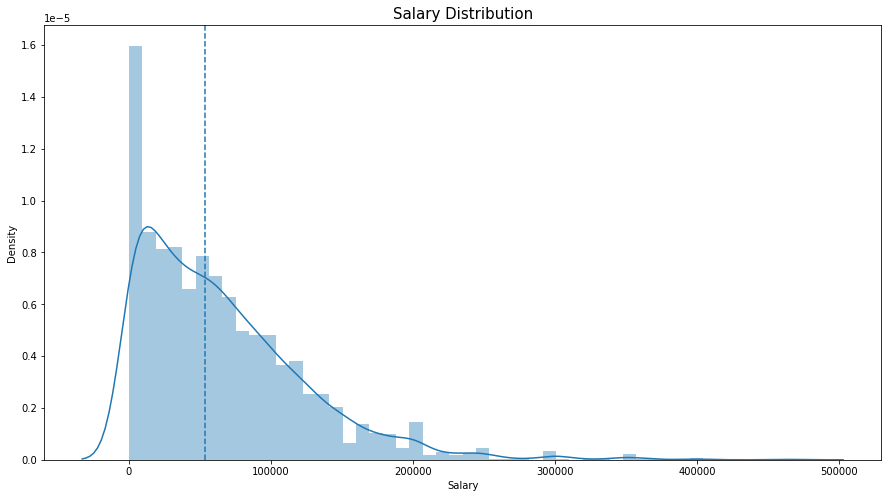

In [ ]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
#outlier가 너무 크게 나타났기 때문에 
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


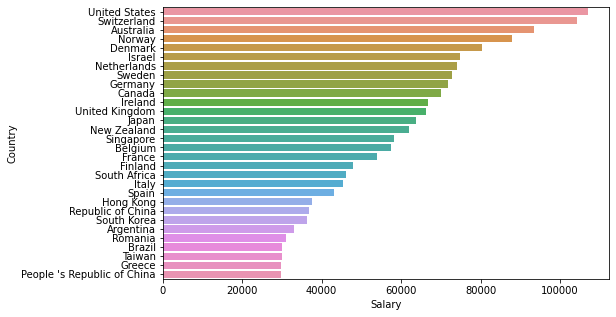

In [ ]:
plt.subplots(figsize=(8,5))
consal=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary', consal.index, data=consal)


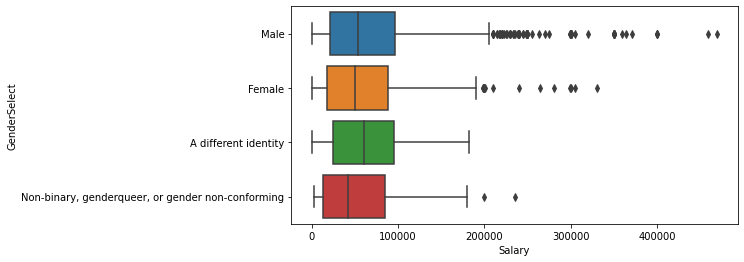

In [ ]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

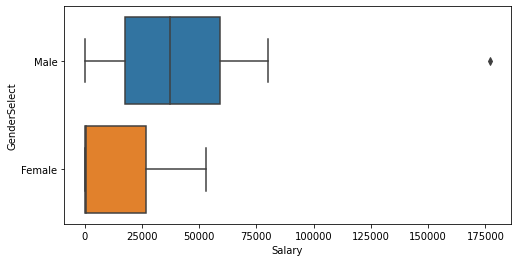

In [ ]:
salkr=salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salkr)

학습용 데이터를 어디에서 얻나요?

In [ ]:
mcq['PublicDatasetsSelect']=mcq['PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(','))

In [ ]:
q=mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)
q.name='course'
q=q[q != 'nan']
q.head(20)

0     Dataset aggregator/platform (i.e. Socrata/Kagg...
0         University/Non-profit research group websites
0                                                 Other
1     Dataset aggregator/platform (i.e. Socrata/Kagg...
2     Dataset aggregator/platform (i.e. Socrata/Kagg...
3             I collect my own data (e.g. web-scraping)
4                                                GitHub
5     Dataset aggregator/platform (i.e. Socrata/Kagg...
5             I collect my own data (e.g. web-scraping)
6     Dataset aggregator/platform (i.e. Socrata/Kagg...
7     Dataset aggregator/platform (i.e. Socrata/Kagg...
7                                                GitHub
7                                         Google Search
7                                    Government website
8         University/Non-profit research group websites
9     Dataset aggregator/platform (i.e. Socrata/Kagg...
9                                                GitHub
9                                         Google

In [ ]:
q=q.value_counts()

In [ ]:
pd.DataFrame(q)

,course
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


##주관식 응답

In [ ]:
answer=pd.read_csv('/content/drive/MyDrive/colab/survey2017/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)

In [ ]:
qc=question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]

In [ ]:
qc.head()

,Column,Question,Asked
22,PersonalProjectsChallengeFreeForm,What is your biggest challenge with the public...,All


In [ ]:
ppcff= answer['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='count'
pd.DataFrame(ppcff)

,count
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
Size,9
-,9


데이터 사이언스 업무에서 가장 많은 시간을 필요하는 일은 무엇인가?

In [ ]:
time=[x for x in mcq.columns if x.find('Time') != -1][4:10]

In [ ]:
time

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

In [ ]:
tdf={}
for feature in time:
  tdf[feature[len('Time'):]]=mcq[feature].mean()

tdf=pd.Series(tdf)
tdf

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64

<function matplotlib.pyplot.show>

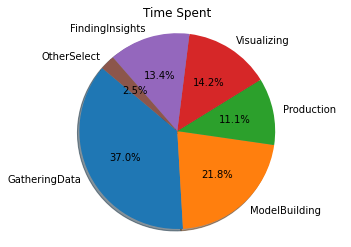

In [ ]:
plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Time Spent")
plt.show

데이터 사이언스 직업을 찾는게 가장 고려해야 할 요소

In [ ]:
qc=question.loc[question['Column'].str.contains('JobFactor')]
qc.Question.values

array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [ ]:
job=[x for x in mcq.columns if x.find('JobFactor') != -1]
job

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

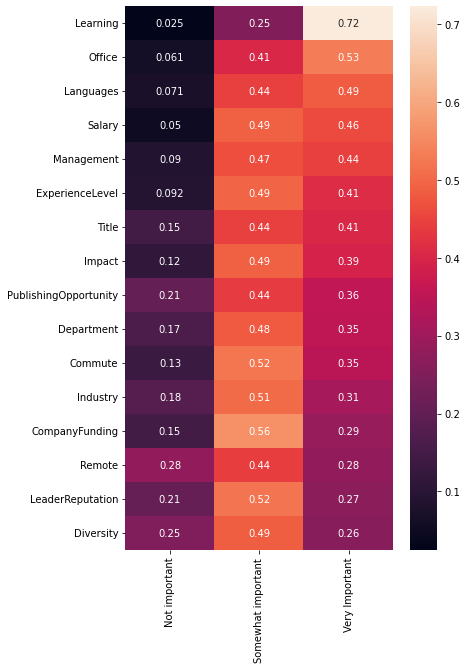

In [ ]:
gdf={}
for feature in job:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  gdf[feature[len('JobFactor'):]] = a

gdf=pd.DataFrame(gdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(gdf.sort_values('Very Important', ascending=False), annot=True)

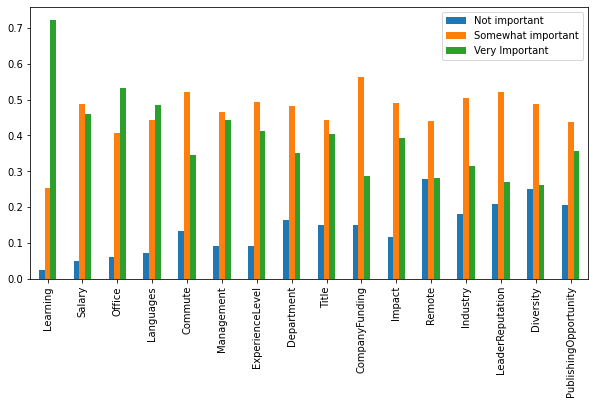

In [ ]:
gdf.plot(kind='bar', figsize=(10,5))
plt.show()

학위가 중요한가

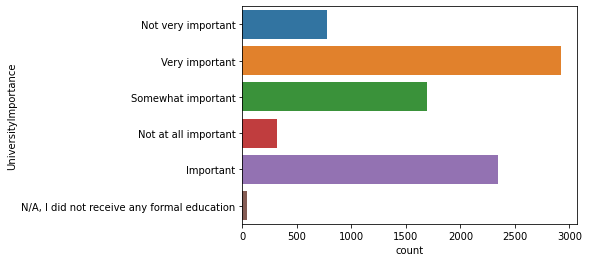

In [ ]:
sns.countplot(y=mcq['UniversityImportance'])

In [ ]:
import plotly.offline as py
import plotly.figure_factory as fig_fact

In [ ]:
top = mcq['UniversityImportance'].value_counts().head(5)
topd=[]
for uni in top.index:
  topd.append(
      mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance']==uni)]['Age']
  )

group_labels=top.index

In [ ]:
print(top.head())
print(topd[:1])

Very important          2925
Important               2347
Somewhat important      1695
Not very important       772
Not at all important     317
Name: UniversityImportance, dtype: int64
[3        56.0
6        35.0
15       58.0
27       34.0
48       27.0
         ... 
16662    33.0
16665    22.0
16686    38.0
16692    34.0
16701    33.0
Name: Age, Length: 2882, dtype: float64]


In [ ]:
fig=fig_fact.create_distplot(topd, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance')

어디에서부터 데이터사이언스를 시작해야할까

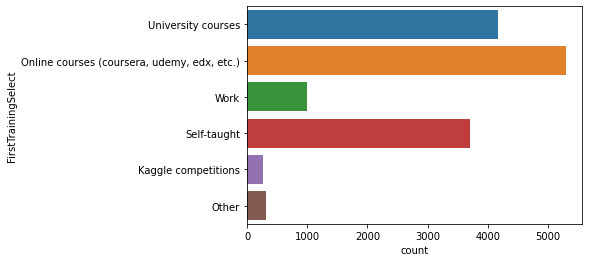

In [ ]:
sns.countplot(y=mcq['FirstTrainingSelect'])

데이터사이언티스트 이력서에서 가장 중요한것은?

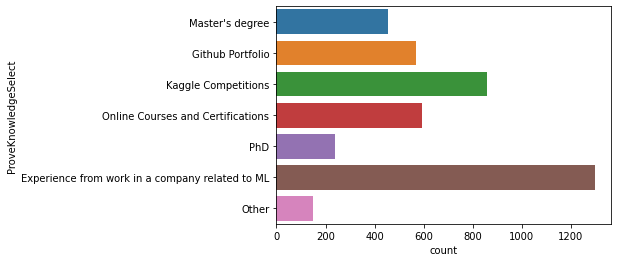

In [ ]:
sns.countplot(y=mcq['ProveKnowledgeSelect'])

수학이 필요할까

In [ ]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()]['AlgorithmUnderstandingLevel'].head()

0    Enough to explain the algorithm to someone non...
3       Enough to refine and innovate on the algorithm
4       Enough to refine and innovate on the algorithm
5    Enough to explain the algorithm to someone non...
6    Enough to explain the algorithm to someone non...
Name: AlgorithmUnderstandingLevel, dtype: object

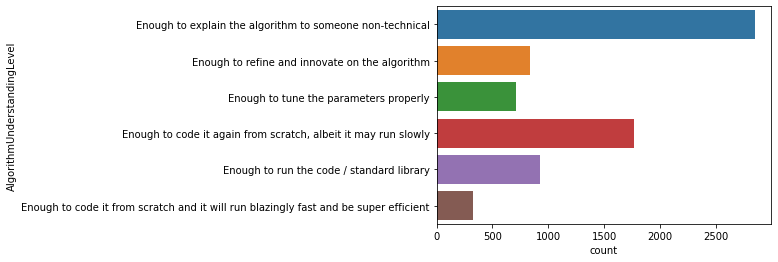

In [ ]:
sns.countplot(y=mcq['AlgorithmUnderstandingLevel'])

어디에서 일을 찾아야할 것인가

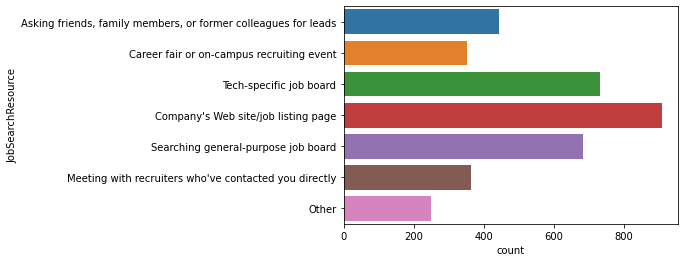

In [ ]:
sns.countplot(y=mcq['JobSearchResource'])